# Course 2 Google Fiber Data Analysis

***

## Project Description

In this activity, you will use your knowledge of SQL and potentially Google Dataflow to combine and move the key datasets you identified for the Google Fiber project into a target table. This represents the extraction phase of an ETL pipeline, when data is pulled from different sources and moved to its destination. You will use the table you create in this activity to develop the final dashboard for stakeholders.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Data sources used

## Business Task

The Google Fiber customer service team’s goal is to understand how often customers are calling customer support after their first inquiry; this will help leadership understand how effectively the team is able to answer customer questions the first time. The dashboard you create should demonstrate an understanding of this goal and provide your stakeholders with insights about repeat caller volumes in different markets and the types of problems they represent. As part of the interview process, they have asked you to create a dashboard that will: 

- Help them understand how often customers are calling customer support after their first inquiry; this will help leadership understand how effectively the team is able to answer customer questions the first time

- Provide insights into the types of customer issues that seem to generate more repeat calls

- Explore repeat caller trends in the three different market cities

- Design charts so that stakeholders can view trends by week, month, quarter, and year. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify



import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Import Data

In [2]:
df = pd.read_csv("googlefiber.csv", parse_dates=['date_created'])

## Data Quick Glance

In [3]:
df.head()

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
1,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
2,2022-01-01,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2022-01-01,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,2022-01-01,7.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,type_3,market_1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_created  1350 non-null   datetime64[ns]
 1   contacts_n    1168 non-null   float64       
 2   contacts_n_1  892 non-null    float64       
 3   contacts_n_2  821 non-null    float64       
 4   contacts_n_3  778 non-null    float64       
 5   contacts_n_4  739 non-null    float64       
 6   contacts_n_5  719 non-null    float64       
 7   contacts_n_6  716 non-null    float64       
 8   contacts_n_7  733 non-null    float64       
 9   new_type      1350 non-null   object        
 10  new_market    1350 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 116.1+ KB


In [5]:
df.dtypes.value_counts()

float64           8
object            2
datetime64[ns]    1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
count,1350,1168.00,892.00,821.00,778.00,739.00,719.00,716.00,733.00,1350,1350
unique,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270,450
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,55.60,6.28,4.24,3.47,3.11,3.05,2.77,2.70,NaN,NaN
std,NaN,90.70,9.58,6.12,3.97,3.60,3.63,3.21,3.38,NaN,NaN
min,NaN,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
25%,NaN,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
count,1168.00,892.00,821.00,778.00,739.00,719.00,716.00,733.00
mean,55.60,6.28,4.24,3.47,3.11,3.05,2.77,2.70
std,90.70,9.58,6.12,3.97,3.60,3.63,3.21,3.38
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,18.00,3.00,2.00,2.00,2.00,2.00,2.00,1.00
75%,40.00,8.00,6.00,5.00,4.00,4.00,4.00,4.00
max,599.00,138.00,108.00,21.00,27.00,24.00,20.00,28.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,new_type,new_market
count,1350,1350
unique,5,3
top,type_4,market_1
freq,270,450


In [9]:
df.columns

Index(['date_created', 'contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')

In [10]:
df.shape

(1350, 11)

In [11]:
df.duplicated().sum()

0

In [12]:
df.fillna(0, inplace=True)

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [13]:
df.columns

Index(['date_created', 'contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')

In [14]:
df2 = df.sort_values(by="date_created")
df2

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
14,2022-01-01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_3
13,2022-01-01,2.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,type_3,market_3
12,2022-01-01,30.00,6.00,0.00,1.00,2.00,0.00,1.00,0.00,type_1,market_1
11,2022-01-01,21.00,2.00,4.00,0.00,0.00,1.00,1.00,0.00,type_2,market_2
...,...,...,...,...,...,...,...,...,...,...,...
1336,2022-03-31,32.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,type_2,market_2
1335,2022-03-31,29.00,3.00,2.00,1.00,1.00,0.00,0.00,0.00,type_2,market_3
1348,2022-03-31,11.00,5.00,1.00,0.00,0.00,0.00,0.00,2.00,type_1,market_3
1341,2022-03-31,22.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,type_3,market_3


In [15]:
df2.reset_index(inplace=True, drop=True)

In [16]:
df2

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
1,2022-01-01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_3
2,2022-01-01,2.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,type_3,market_3
3,2022-01-01,30.00,6.00,0.00,1.00,2.00,0.00,1.00,0.00,type_1,market_1
4,2022-01-01,21.00,2.00,4.00,0.00,0.00,1.00,1.00,0.00,type_2,market_2
...,...,...,...,...,...,...,...,...,...,...,...
1345,2022-03-31,32.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,type_2,market_2
1346,2022-03-31,29.00,3.00,2.00,1.00,1.00,0.00,0.00,0.00,type_2,market_3
1347,2022-03-31,11.00,5.00,1.00,0.00,0.00,0.00,0.00,2.00,type_1,market_3
1348,2022-03-31,22.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,type_3,market_3


In [17]:
df2["date_created"].nunique()

90

In [18]:
#df2.to_csv("googlefiber.csv", index=False)

In [19]:
new_type = df.groupby(["new_type"], as_index=True).mean()
new_type

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
new_type,,,,,,,,
type_1,13.16,1.86,1.43,1.26,1.20,1.12,1.01,1.00
type_2,104.49,5.26,3.63,2.97,2.70,2.62,2.41,2.57
type_3,8.98,1.24,0.96,0.85,0.66,0.55,0.59,0.59
type_4,1.42,0.12,0.08,0.08,0.06,0.05,0.05,0.04
type_5,112.47,12.26,6.81,4.85,3.87,3.79,3.28,3.12


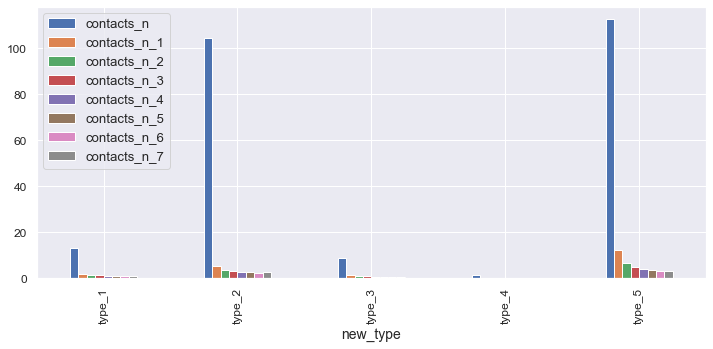

In [20]:
new_type.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

In [21]:
new_market = df.groupby(['new_market'], as_index=True).mean()
new_market.head()

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
new_market,,,,,,,,
market_1,100.74,7.52,4.78,3.75,3.28,3.15,2.79,2.82
market_2,9.75,0.59,0.32,0.20,0.18,0.16,0.13,0.16
market_3,33.82,4.33,2.64,2.05,1.64,1.56,1.49,1.41


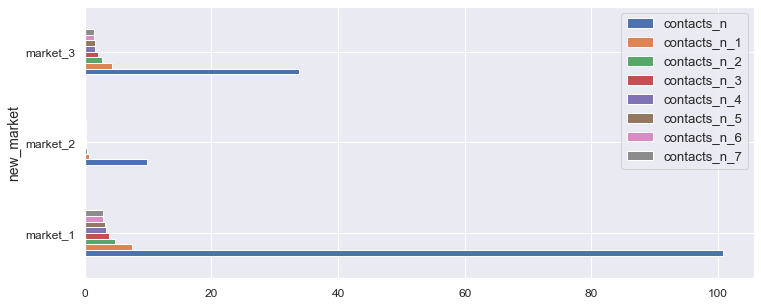

In [22]:
new_market.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

**==========================================================================================================**

# Data Visualization

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is Matplotlib.  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.



## Seaborn Library

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

## Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [23]:
# Check plot styles
#plt.style.available

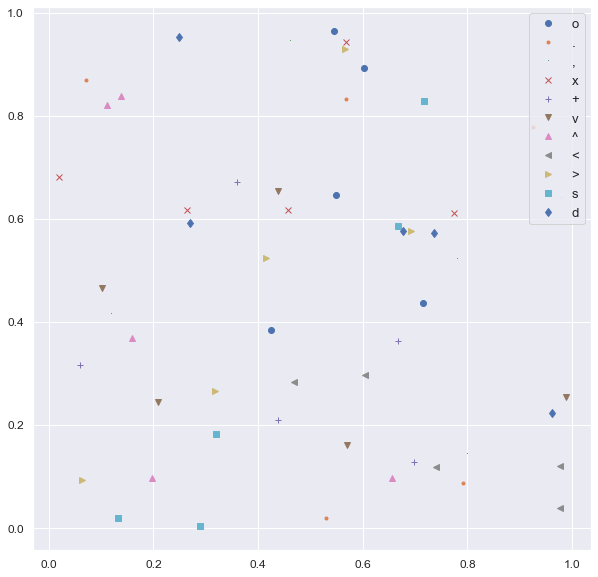

In [24]:
markers = ['o','.',',','x','+','v','^','<','>','s','d']

plt.figure(figsize=(10,10))

for m in markers:
    plt.plot(np.random.rand(5),np.random.rand(5),m,label=m)

plt.legend()
plt.show()

## FacetGrid (Building structured multi-plot grids)

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

Each of relplot(), displot(), catplot(), and lmplot() use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

### Seaborn Version

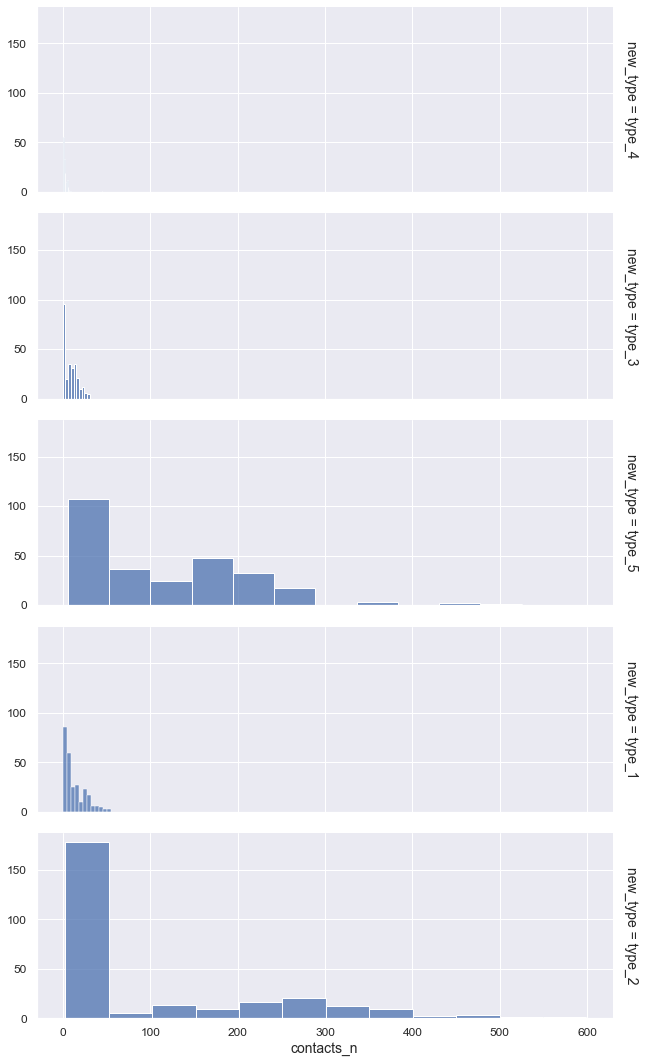

In [25]:
g = sns.FacetGrid(data=df, row="new_type", hue=None, row_order=None, height=3, aspect=3, margin_titles=True)
g.map(sns.histplot, "contacts_n")
g.add_legend()
plt.show()

***

## Histogram

### Pandas Version

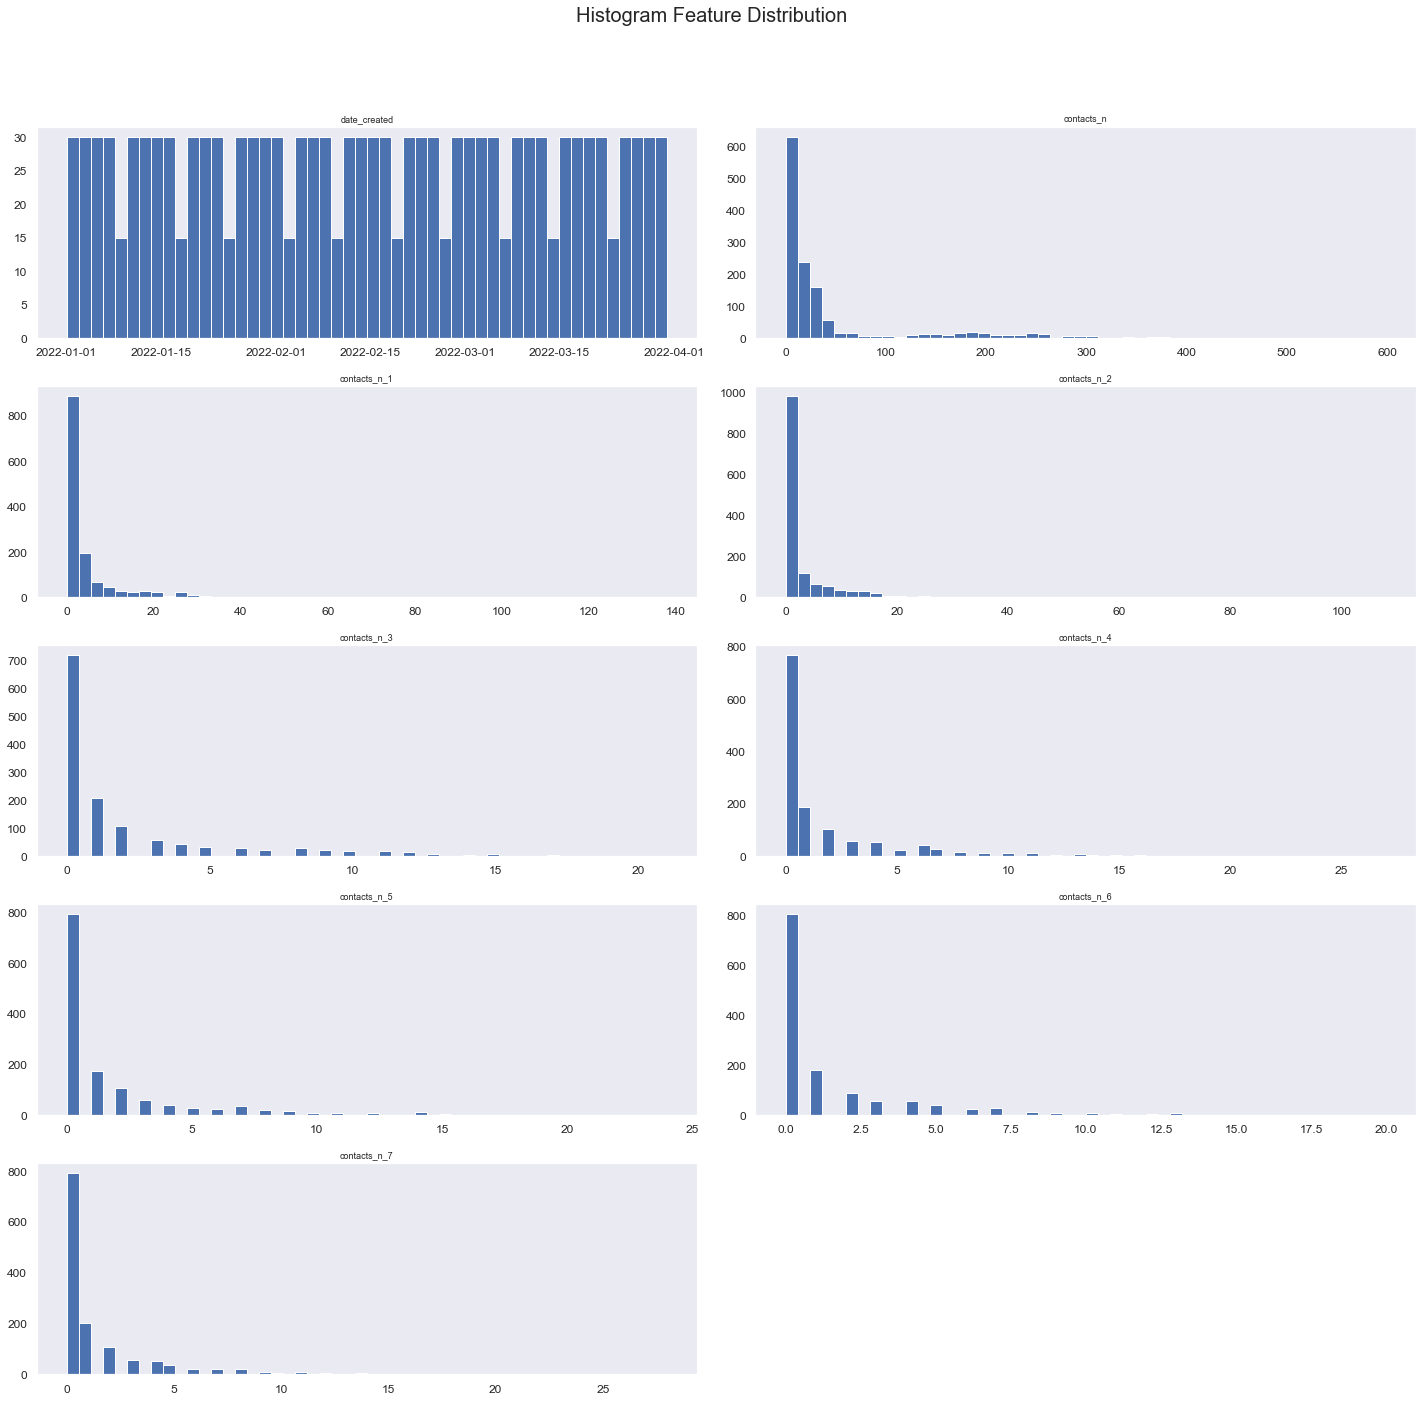

In [26]:
df.hist(bins=50, figsize=(20,40), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

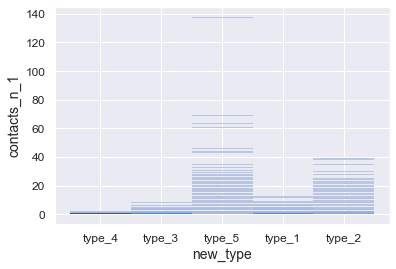

In [27]:
sns.histplot(data=df, x="new_type", y="contacts_n_1", kde=True)
plt.show()

### Seaborn Version

In [28]:
df.head(1)

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1


In [29]:
df.mean()

contacts_n     48.10
contacts_n_1    4.15
contacts_n_2    2.58
contacts_n_3    2.00
contacts_n_4    1.70
contacts_n_5    1.62
contacts_n_6    1.47
contacts_n_7    1.47
dtype: float64

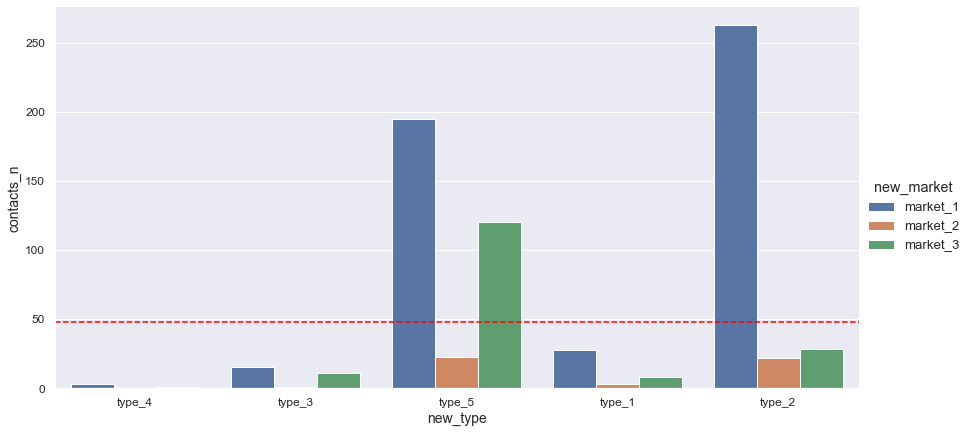

In [30]:
sns.catplot(x="new_type", y="contacts_n", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=48.1, color='red', ls='--')
plt.show()

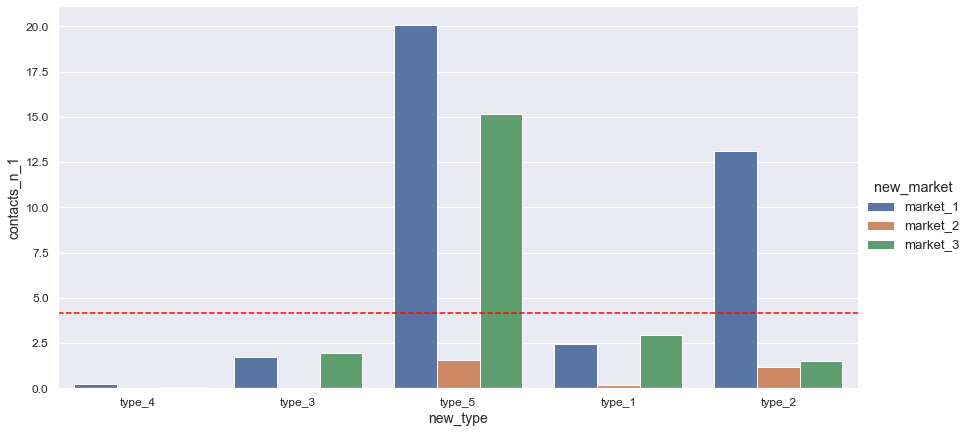

In [31]:
sns.catplot(x="new_type", y="contacts_n_1", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=4.15, color='red', ls='--')
plt.show()

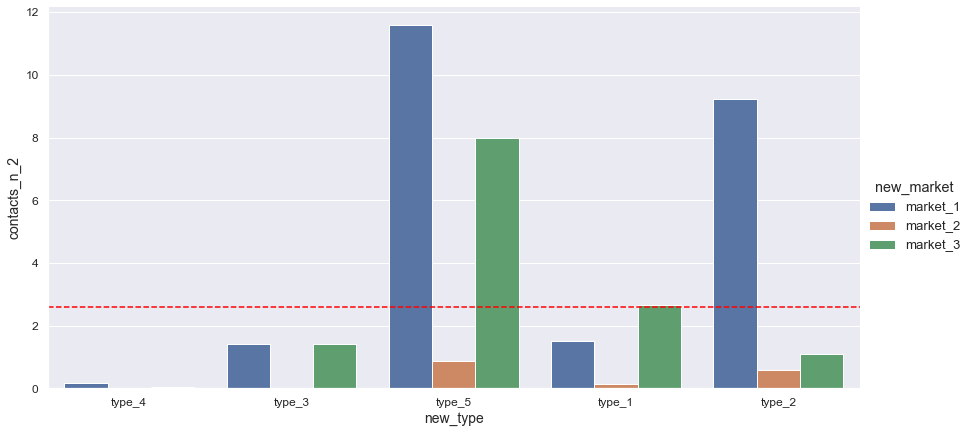

In [32]:
sns.catplot(x="new_type", y="contacts_n_2", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=2.58, color='red', ls='--')
plt.show()

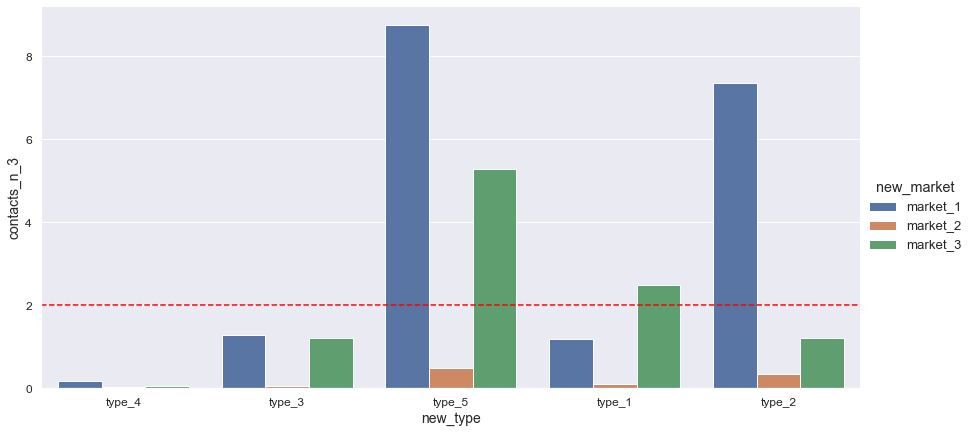

In [33]:
sns.catplot(x="new_type", y="contacts_n_3", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=2.00, color='red', ls='--')
plt.show()

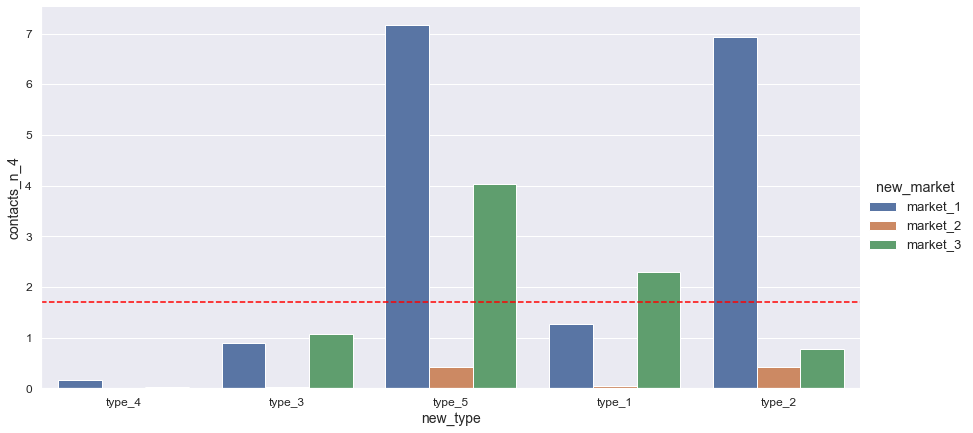

In [34]:
sns.catplot(x="new_type", y="contacts_n_4", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=1.70, color='red', ls='--')
plt.show()

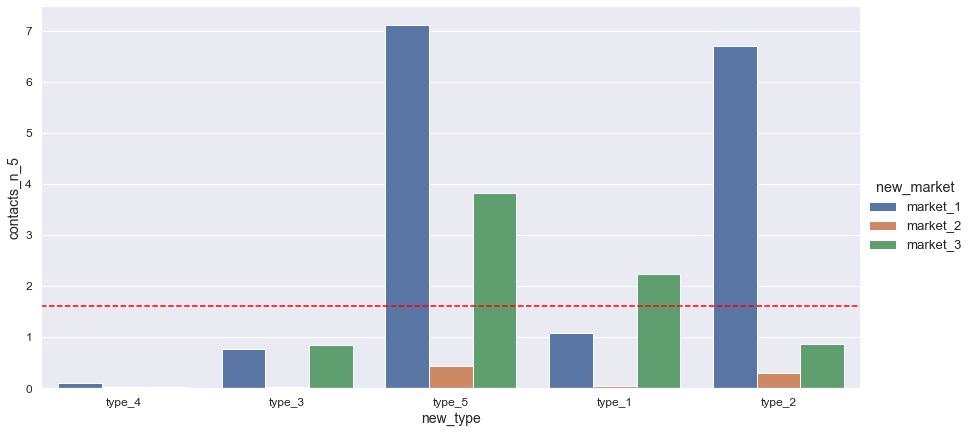

In [35]:
sns.catplot(x="new_type", y="contacts_n_5", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=1.62, color='red', ls='--')
plt.show()

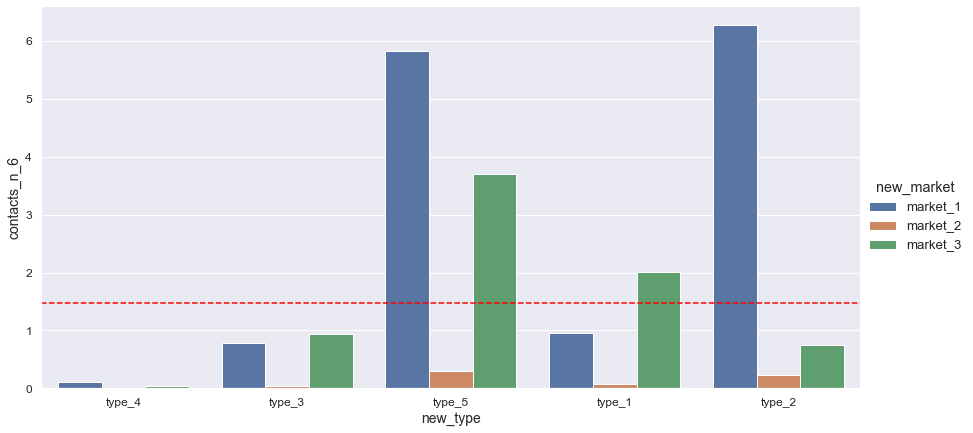

In [36]:
sns.catplot(x="new_type", y="contacts_n_6", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=1.47, color='red', ls='--')
plt.show()

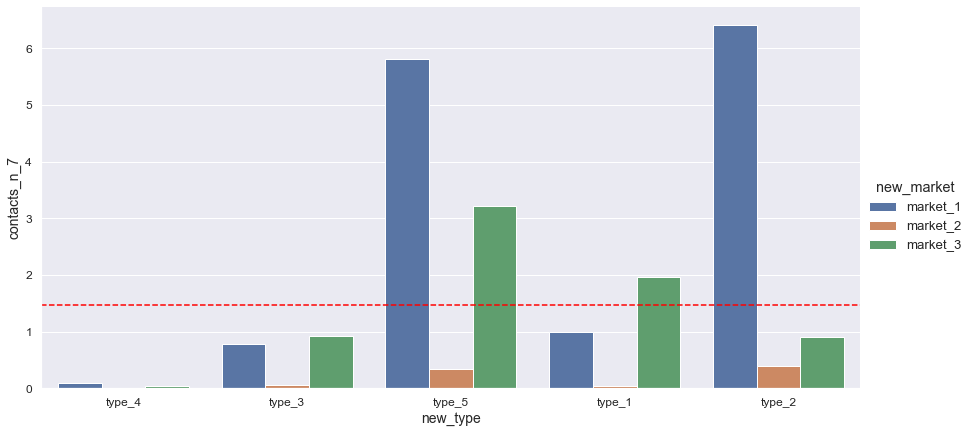

In [37]:
sns.catplot(x="new_type", y="contacts_n_7", kind='bar', data=df, hue ='new_market', aspect=2, height=6, ci=None)
plt.axhline(y=1.47, color='red', ls='--')
plt.show()

## Line Plots

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

### Pandas Method

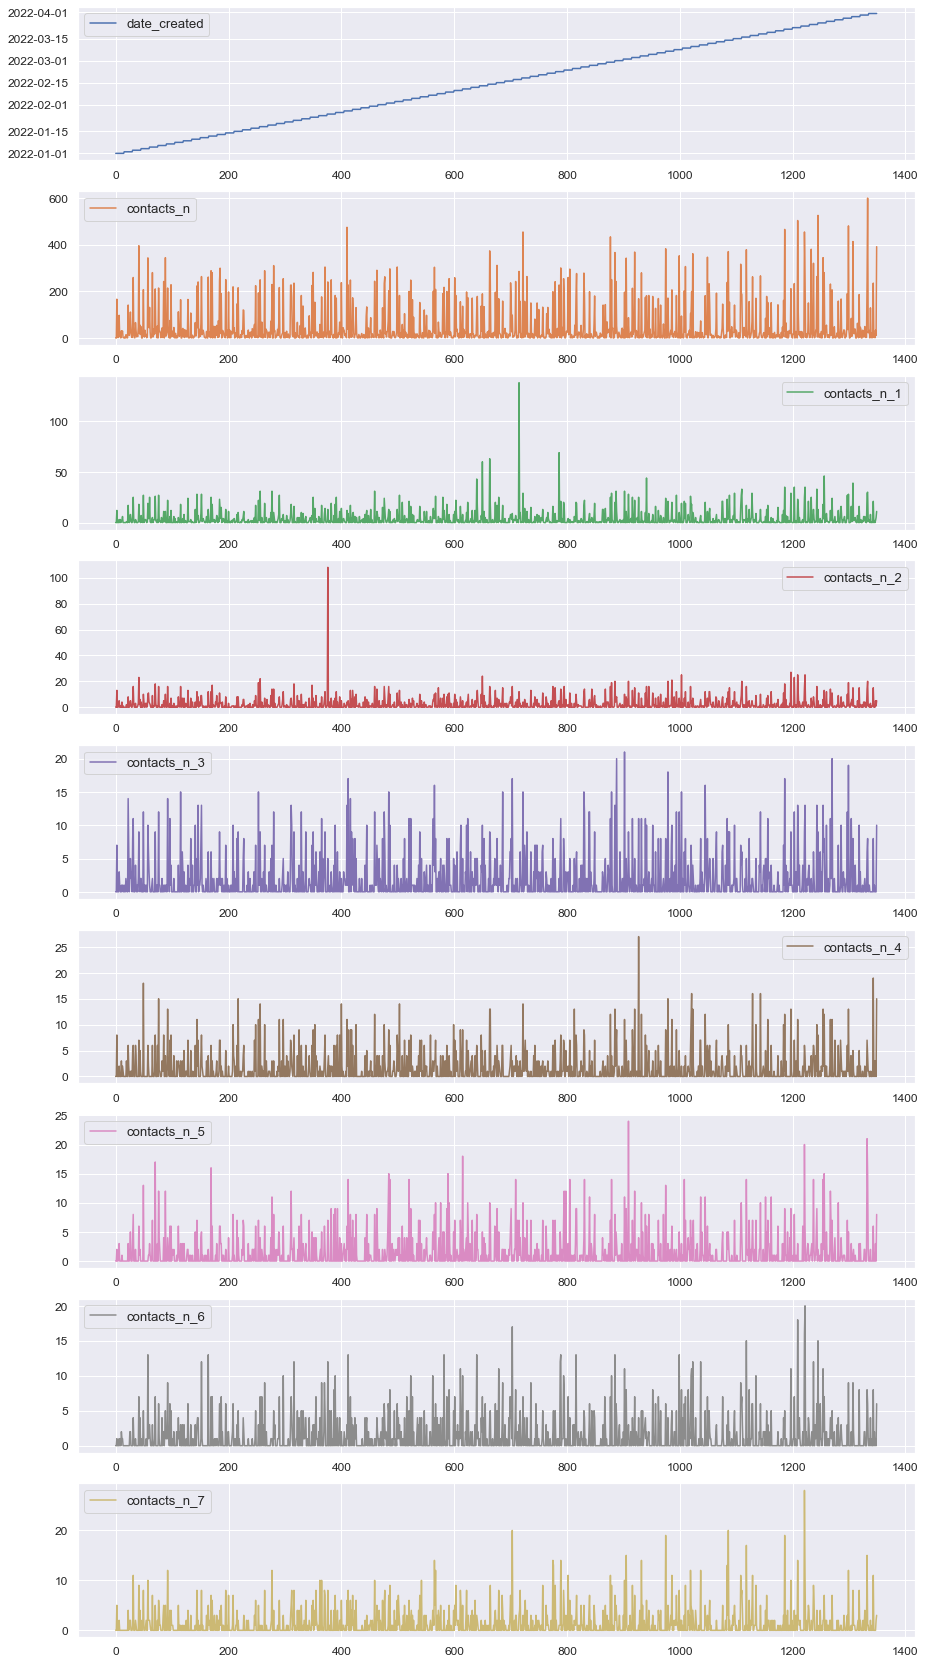

In [38]:
df.plot(subplots = True, figsize=(15, 30), sharex=False, sharey=False)
plt.show()

### Seaborn Version

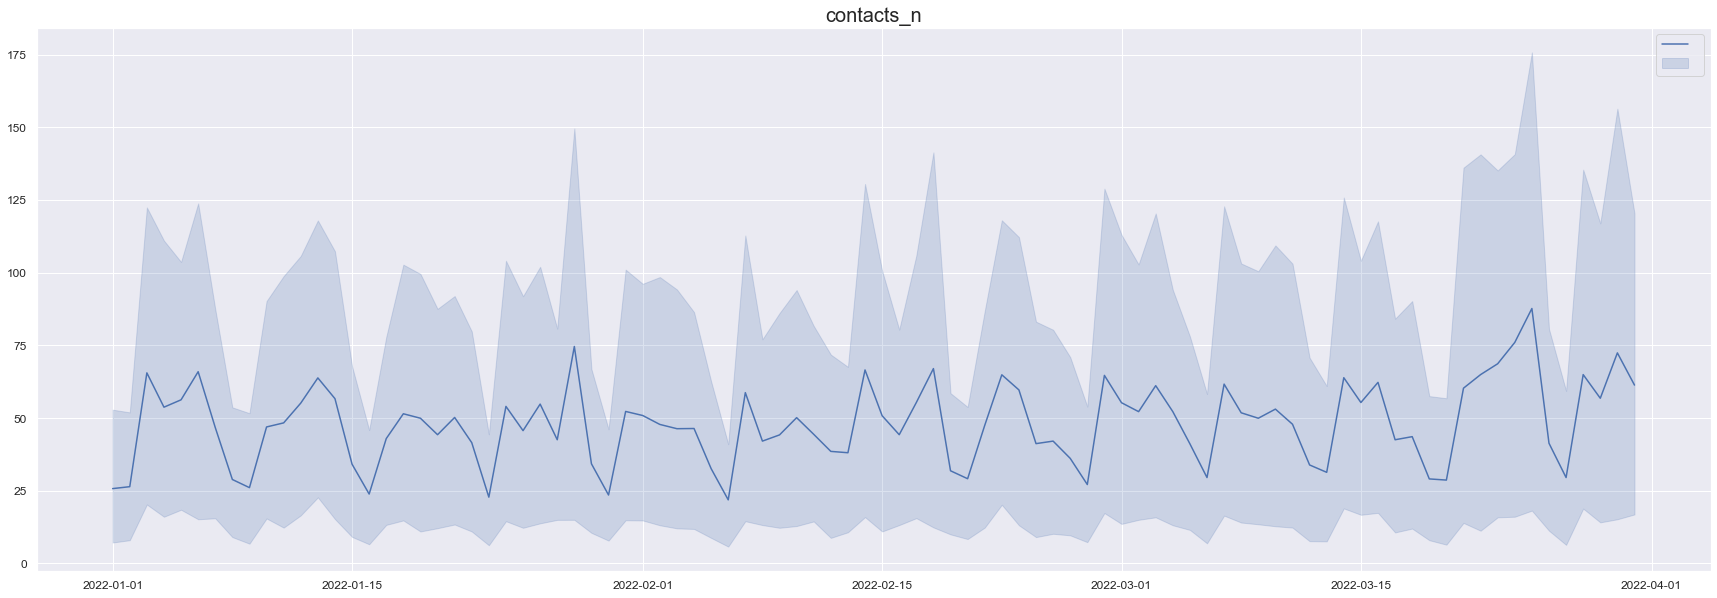

In [39]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date_created, y=df.contacts_n, data=df, estimator='mean')
plt.title("contacts_n", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

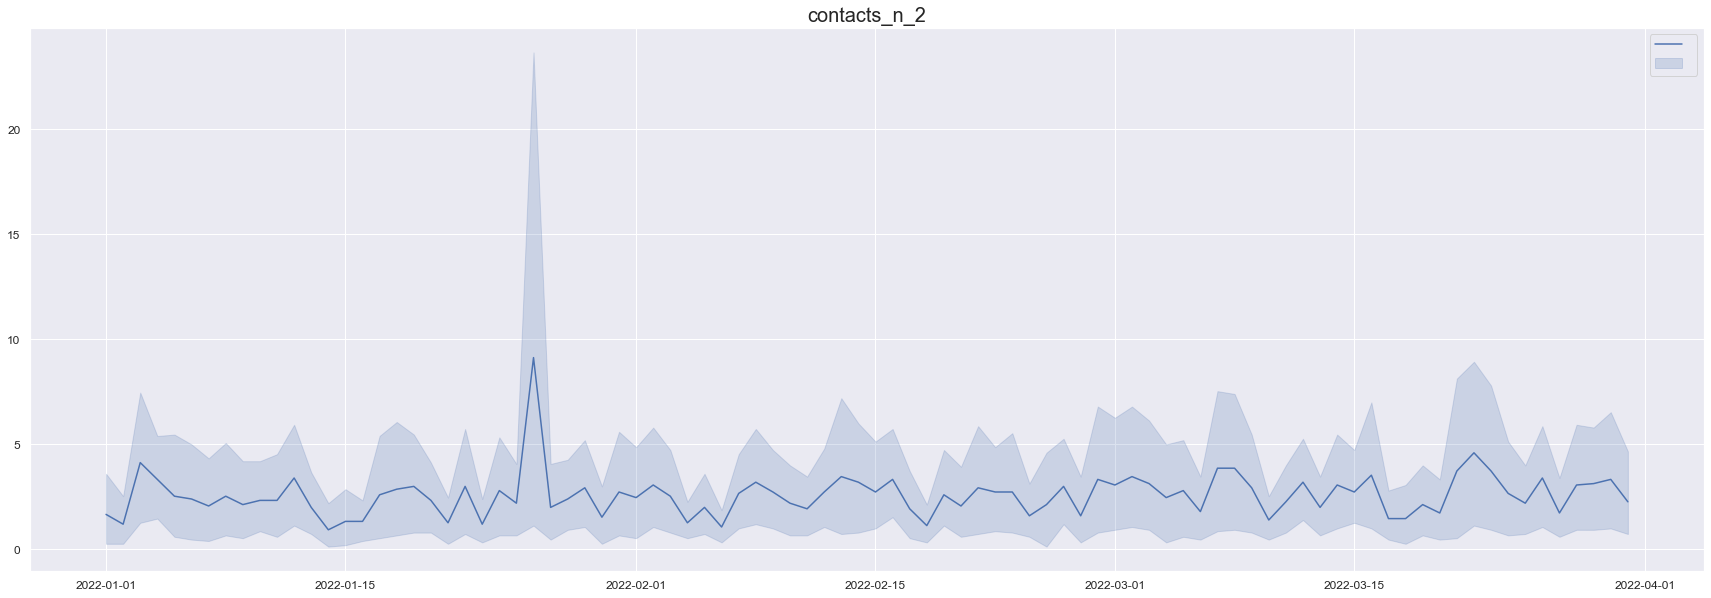

In [40]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date_created, y=df.contacts_n_2, data=df, estimator='mean')
plt.title("contacts_n_2", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

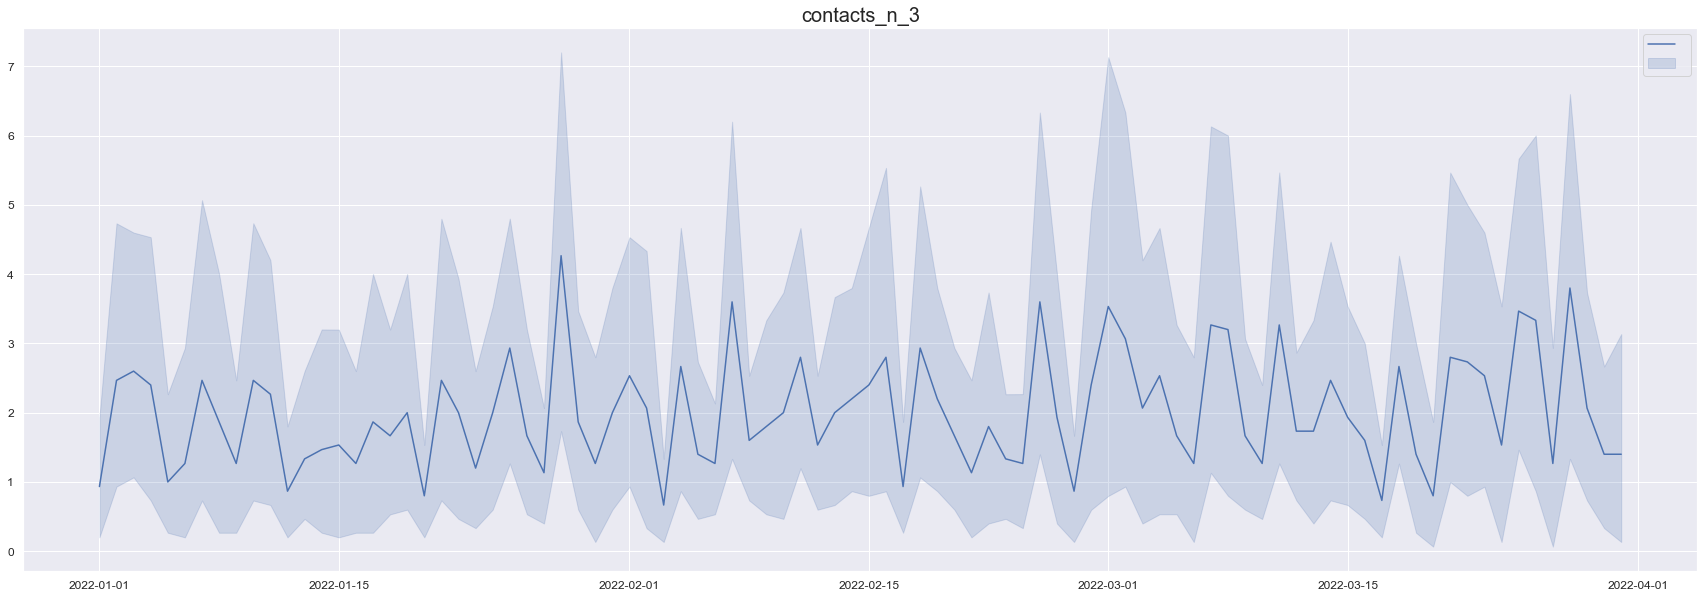

In [41]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date_created, y=df.contacts_n_3, data=df, estimator='mean')
plt.title("contacts_n_3", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

### Pandas Version

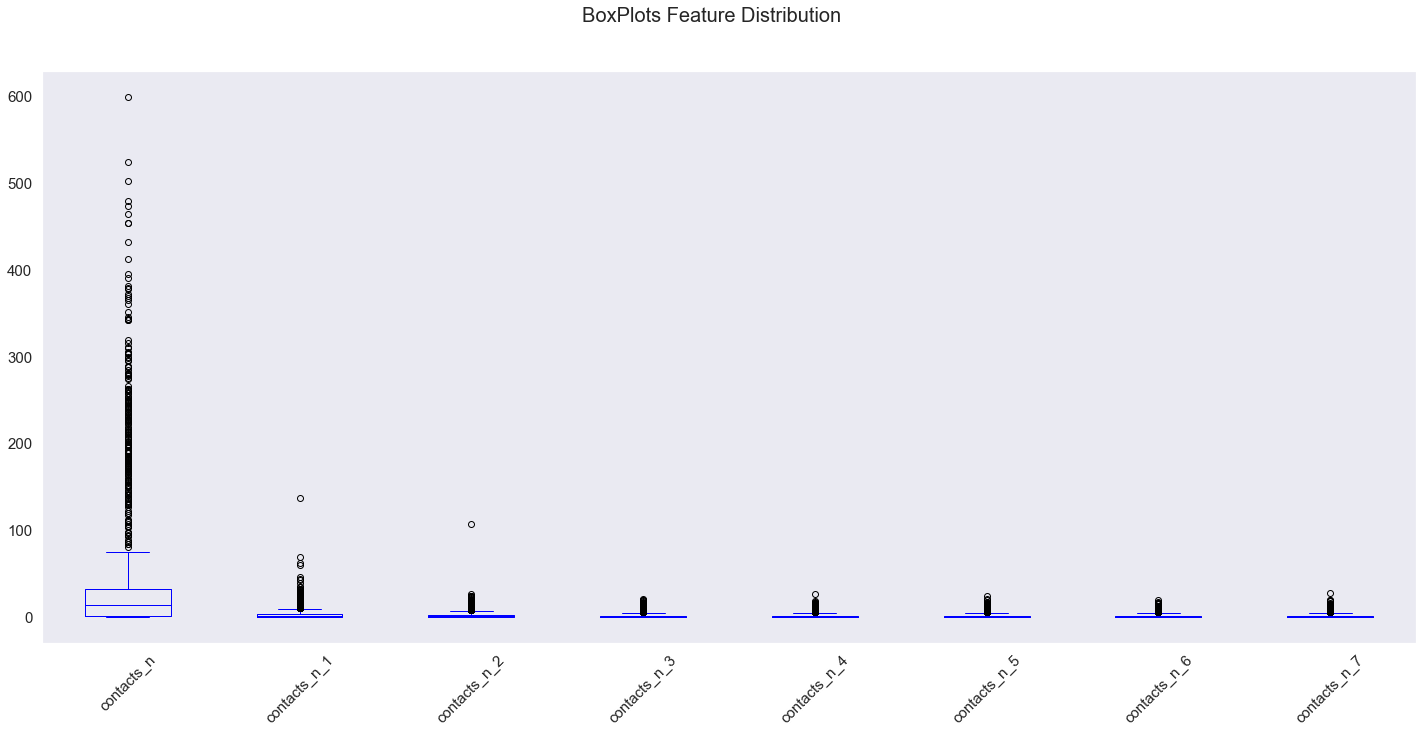

In [42]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Heatmap

### Seaborn Version

In [43]:
df.corr()

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
contacts_n,1.00,0.74,0.68,0.74,0.74,0.71,0.75,0.73
contacts_n_1,0.74,1.00,0.63,0.64,0.63,0.61,0.60,0.57
contacts_n_2,0.68,0.63,1.00,0.65,0.59,0.60,0.65,0.60
contacts_n_3,0.74,0.64,0.65,1.00,0.74,0.67,0.70,0.66
contacts_n_4,0.74,0.63,0.59,0.74,1.00,0.66,0.66,0.64
contacts_n_5,0.71,0.61,0.60,0.67,0.66,1.00,0.67,0.64
contacts_n_6,0.75,0.60,0.65,0.70,0.66,0.67,1.00,0.72
contacts_n_7,0.73,0.57,0.60,0.66,0.64,0.64,0.72,1.00


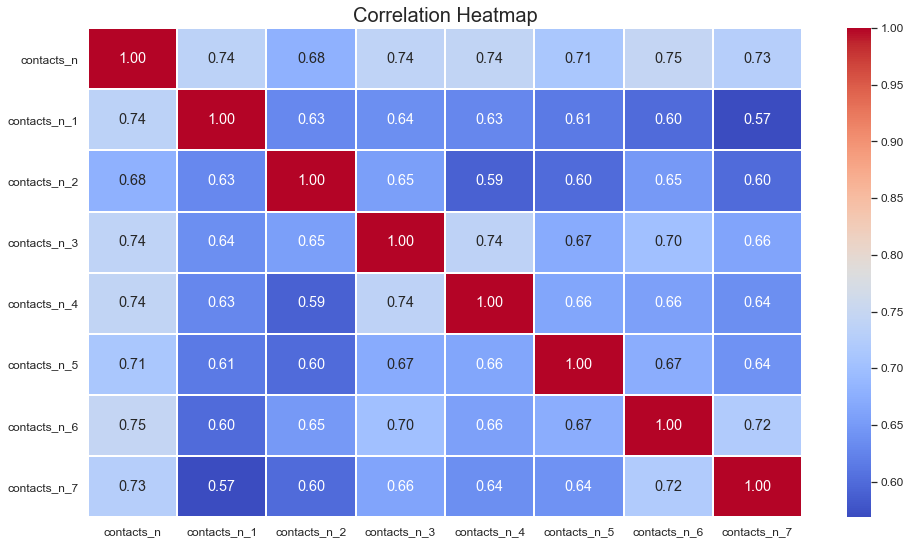

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

***

#### Python code done by Dennis Lam